In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
#from util import getBinaryData, sigmoid, sigmoid_cost, error_rate

In [5]:
def getBinaryData():
    Y = []
    X = []
    first = True
    for line in open('/Users/ggiorcelli/downloads/fer2013.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            y = int(row[0])
            if y == 0 or y == 1:
                Y.append(y)
                X.append([int(p) for p in row[1].split()])
    return np.array(X) / 255.0, np.array(Y)       ##255 is the max value for the pixel

In [6]:
def sigmoid(A):
    return 1 / (1 + np.exp(-A))

In [7]:
def sigmoid_cost(T, Y):
    return -(T*np.log(Y) + (1-T)*np.log(1-Y)).sum()

In [8]:
def error_rate(targets, predictions):
    return np.mean(targets != predictions)

In [10]:
class LogisticModel(object):
    def __init__(self):
        pass

    def fit(self, X, Y, learning_rate=10e-7, reg=0*10e-22, epochs=120000, show_fig=False):
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]

        N, D = X.shape
        self.W = np.random.randn(D) / np.sqrt(D)
        self.b = 0

        costs = []
        best_validation_error = 1
        for i in range(epochs):
                # forward propagation and cost calculation
                pY = self.forward(X)

                # gradient descent step
                self.W -= learning_rate*(X.T.dot(pY - Y) + reg*self.W)
                self.b -= learning_rate*((pY - Y).sum() + reg*self.b)

                
                if i % 20 == 0:
                    pYvalid = self.forward(Xvalid)
                    c = sigmoid_cost(Yvalid, pYvalid)
                    costs.append(c)
                    e = error_rate(Yvalid, np.round(pYvalid))
                    print("i:", i, "cost:", c, "error:", e)
                    if e < best_validation_error:
                        best_validation_error = e
        print("best_validation_error:", best_validation_error)

        if show_fig:
            plt.plot(costs)
            plt.show()
            
    def forward(self, X):
        return sigmoid(X.dot(self.W) + self.b)

    def predict(self, X):
        pY = self.forward(X)
        return np.round(pY)


    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)    

In [11]:
def main():
    X, Y = getBinaryData()

    X0 = X[Y==0, :]
    X1 = X[Y==1, :]
    X1 = np.repeat(X1, 9, axis=0)
    X = np.vstack([X0, X1])
    Y = np.array([0]*len(X0) + [1]*len(X1))

    # N, D = X.shape
    # print "N:", N
    # print "p(Y=0):", np.sum(Y == 0) / float(N), "p(Y=1):", np.sum(Y == 1) / float(N)
    
    model = LogisticModel()
    model.fit(X, Y, show_fig=True)
    model.score(X, Y)
    # scores = cross_val_score(model, X, Y, cv=5)
    # print "score mean:", np.mean(scores), "stdev:", np.std(scores)

i: 0 cost: 692.221340643 error: 0.46
i: 20 cost: 679.598587508 error: 0.438
i: 40 cost: 670.434140099 error: 0.392
i: 60 cost: 663.450293199 error: 0.361
i: 80 cost: 657.793226804 error: 0.352
i: 100 cost: 653.058657489 error: 0.358
i: 120 cost: 649.009647586 error: 0.356
i: 140 cost: 645.489689491 error: 0.355
i: 160 cost: 642.388386342 error: 0.352
i: 180 cost: 639.624618739 error: 0.35
i: 200 cost: 637.137032482 error: 0.353
i: 220 cost: 634.878189499 error: 0.348
i: 240 cost: 632.810767504 error: 0.342
i: 260 cost: 630.90498679 error: 0.345
i: 280 cost: 629.136808336 error: 0.346
i: 300 cost: 627.486636058 error: 0.344
i: 320 cost: 625.938359917 error: 0.343
i: 340 cost: 624.478636474 error: 0.342
i: 360 cost: 623.096339189 error: 0.339
i: 380 cost: 621.782132767 error: 0.338
i: 400 cost: 620.528139861 error: 0.335
i: 420 cost: 619.327677603 error: 0.333
i: 440 cost: 618.175047625 error: 0.327
i: 460 cost: 617.065367501 error: 0.327
i: 480 cost: 615.994434547 error: 0.325
i: 500 co

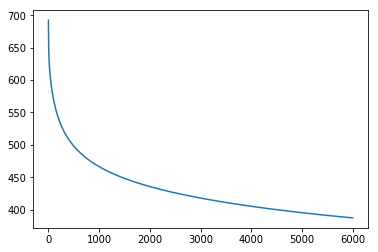

In [12]:
if __name__ == '__main__':
    main()